In [1]:
import numpy as np
from test import test_index
from sklearn.model_selection import train_test_split


Get the dataset

In [2]:
all_data = np.loadtxt('./sample_data/final128_10K.txt')
(data_matrix, query_matrix) = train_test_split(all_data, test_size = 0.1)
len(data_matrix), len(query_matrix)

(9000, 1000)

In [3]:
data_matrix[0].shape

(128,)

<hr>

## Params

In [4]:
regularity = 16
candidates = 100
guard_hops = 25
attempts = 1
k = 100 # top k neigbours

<hr>

In [5]:
params = {'M': regularity, 'efConstruction': candidates, 'post' : 2}
test_index('hnsw', data=data_matrix, query=query_matrix, k=k, params=params)

{'method': 'hnsw',
 'construction-time': 1.02,
 'construction-memory': 24.16,
 'search-time': 0.021,
 'search-memory': 389.12,
 'recall': 0.8}

In [6]:
params = {'NN': regularity, 'efConstruction': candidates}
test_index('sw-graph', data=data_matrix, query=query_matrix, k=k, params=params)

{'method': 'sw-graph',
 'construction-time': 0.523,
 'construction-memory': 2.36,
 'search-time': 0.037,
 'search-memory': 425.98,
 'recall': 0.82}

In [7]:
params = {'regularity':regularity, 'attempts':attempts, 'guard_hops':guard_hops}
test_index('NSWG', data=data_matrix, query=query_matrix, k=k, params=params)

{'method': 'NSWG',
 'construction-time': 4.998,
 'construction-memory': 30.63,
 'search-time': 0.726,
 'search-memory': 708.61,
 'recall': 0.87}

In [8]:
params = {'leaf_size' : 2}
test_index('kd-tree', data=data_matrix, query=query_matrix, k=k, params=params)

{'method': 'kd-tree',
 'construction-time': 0.147,
 'construction-memory': 16.94,
 'search-time': 20.614,
 'search-memory': 839.68,
 'recall': 1.0}

In [9]:
params = {'leaf_size' : 2}
test_index('ball-tree', data=data_matrix, query=query_matrix, k=k, params=params)

{'method': 'ball-tree',
 'construction-time': 0.137,
 'construction-memory': 8.46,
 'search-time': 4.023,
 'search-memory': 36.86,
 'recall': 1.0}

## Regularities comparison

In [10]:
regularities = [2, 4, 8, 16, 32, 64, 128, 256]

In [11]:
from collections import defaultdict
methods = [('hnsw', {'M': None, 'post' : 2}), 
           ('sw-graph', {'NN': None}),
           ('NSWG', {'regularity': None, 'guard_hops':25})
            ]
searching = defaultdict(list)
construction = defaultdict(list)
recalls = defaultdict(list)
construction_memory = defaultdict(list)
search_memory = defaultdict(list)
for reg in regularities:
    for method, params in methods:
        params[list(params.keys())[0]] = reg
        result = test_index(method, data=data_matrix, query=query_matrix, k=k, params=params)
        construction[method].append(result['construction-time'])
        searching[method].append(result['search-time'])
        recalls[method].append(result['recall'])
        construction_memory[method].append(result['construction-memory'])
        search_memory[method].append(result['search-memory'])
        
        
        
        
    
        
    

In [12]:
recalls

defaultdict(list,
            {'hnsw': [0.32, 0.56, 0.72, 0.8, 0.83, 0.84, 0.84, 1.0],
             'sw-graph': [0.14, 0.27, 0.53, 0.82, 0.96, 1.0, 1.0, 1.0],
             'NSWG': [0.08, 0.29, 0.68, 0.87, 0.95, 0.98, 0.99, 1.0]})

In [13]:
construction

defaultdict(list,
            {'hnsw': [0.803, 1.223, 1.487, 1.696, 1.653, 1.662, 1.748, 7.235],
             'sw-graph': [0.043,
              0.107,
              0.112,
              0.187,
              0.443,
              1.178,
              2.993,
              7.823],
             'NSWG': [0.596,
              1.326,
              2.668,
              4.871,
              9.842,
              18.648,
              34.273,
              57.648]})

In [14]:
searching

defaultdict(list,
            {'hnsw': [0.011, 0.018, 0.017, 0.021, 0.03, 0.026, 0.028, 0.097],
             'sw-graph': [0.012,
              0.016,
              0.026,
              0.037,
              0.076,
              0.166,
              0.494,
              1.807],
             'NSWG': [0.259, 0.315, 0.485, 0.796, 1.309, 2.276, 4.428, 7.654]})

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 25)

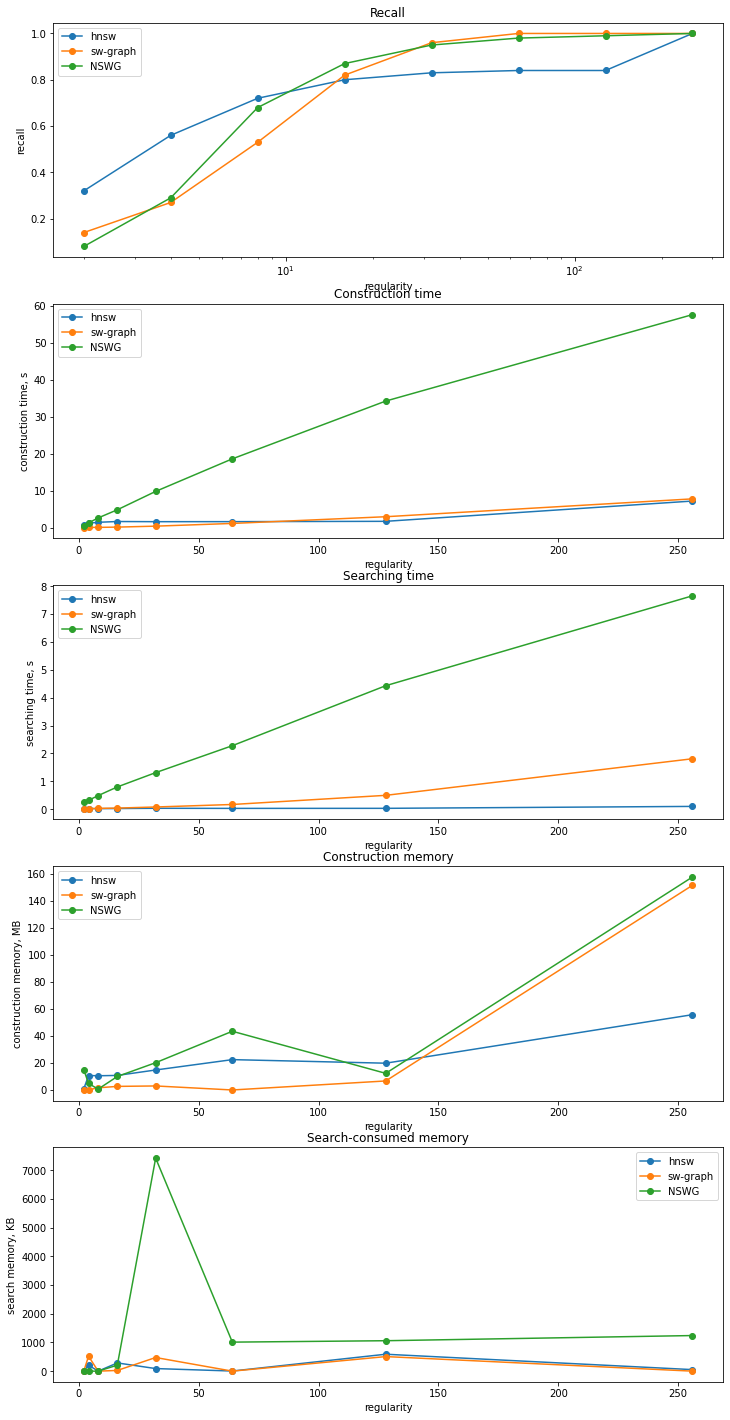

In [16]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5)
ax1.set(xlabel='regularity', ylabel='recall')
ax1.set_xscale('log')
for val in recalls.values():
    ax1.plot(regularities, val, marker="o")
ax1.legend(recalls.keys())
ax1.set_title('Recall')


ax2.set_title('Construction time')
ax2.set(xlabel='regularity', ylabel='construction time, s')
# ax2.set_xscale('log')
for val in construction.values():
    ax2.plot(regularities, val, marker="o")
ax2.legend(construction.keys())

ax3.set_title('Searching time')
ax3.set(xlabel='regularity', ylabel='searching time, s')
# ax3.set_xscale('log')
for val in searching.values():
    ax3.plot(regularities, val, marker="o")
ax3.legend(searching.keys())


ax4.set_title('Construction memory')
ax4.set(xlabel='regularity', ylabel='construction memory, MB')
for val in construction_memory.values():
    ax4.plot(regularities, val, marker="o")
ax4.legend(construction_memory.keys())

ax5.set_title('Search-consumed memory')
ax5.set(xlabel='regularity', ylabel='search memory, KB')
for val in search_memory.values():
    ax5.plot(regularities, val, marker="o")
ax5.legend(search_memory.keys())


plt.show()